In [1]:
import pandas as pd

df_train = pd.read_csv("titanic_train.csv")
df_train = df_train[["pclass","sex","age","sibsp","parch","fare", "survived"]]
df_train.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,3,female,NaN,0,0,7.7333,1
1,3,male,38.0,0,0,8.6625,0
2,3,female,30.0,1,1,24.1500,0
3,2,female,54.0,1,3,23.0000,1
4,2,male,40.0,0,0,13.0000,0


In [2]:
from sklearn.preprocessing import LabelEncoder

df_train.dropna(inplace=True)
le = LabelEncoder()
df_train.sex = le.fit_transform(df_train.sex)#male: 1, female: 0
df_train.head()

,pclass,sex,age,sibsp,parch,fare,survived
1,3,1,38.0,0,0,8.6625,0
2,3,0,30.0,1,1,24.1500,0
3,2,0,54.0,1,3,23.0000,1
4,2,1,40.0,0,0,13.0000,0
5,3,1,28.0,0,0,22.5250,0


In [3]:
X = df_train[["pclass","sex","age","sibsp","parch","fare"]]
Y = df_train[["survived"]]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 1)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy on train data: ', accuracy_score(y_true=y_train, y_pred=dt_clf.predict(X_train)))
print('Accuracy on test data: ', accuracy_score(y_true=y_test, y_pred=dt_clf.predict(X_test)))

Accuracy on train data:  0.9802371541501976
Accuracy on test data:  0.7810650887573964


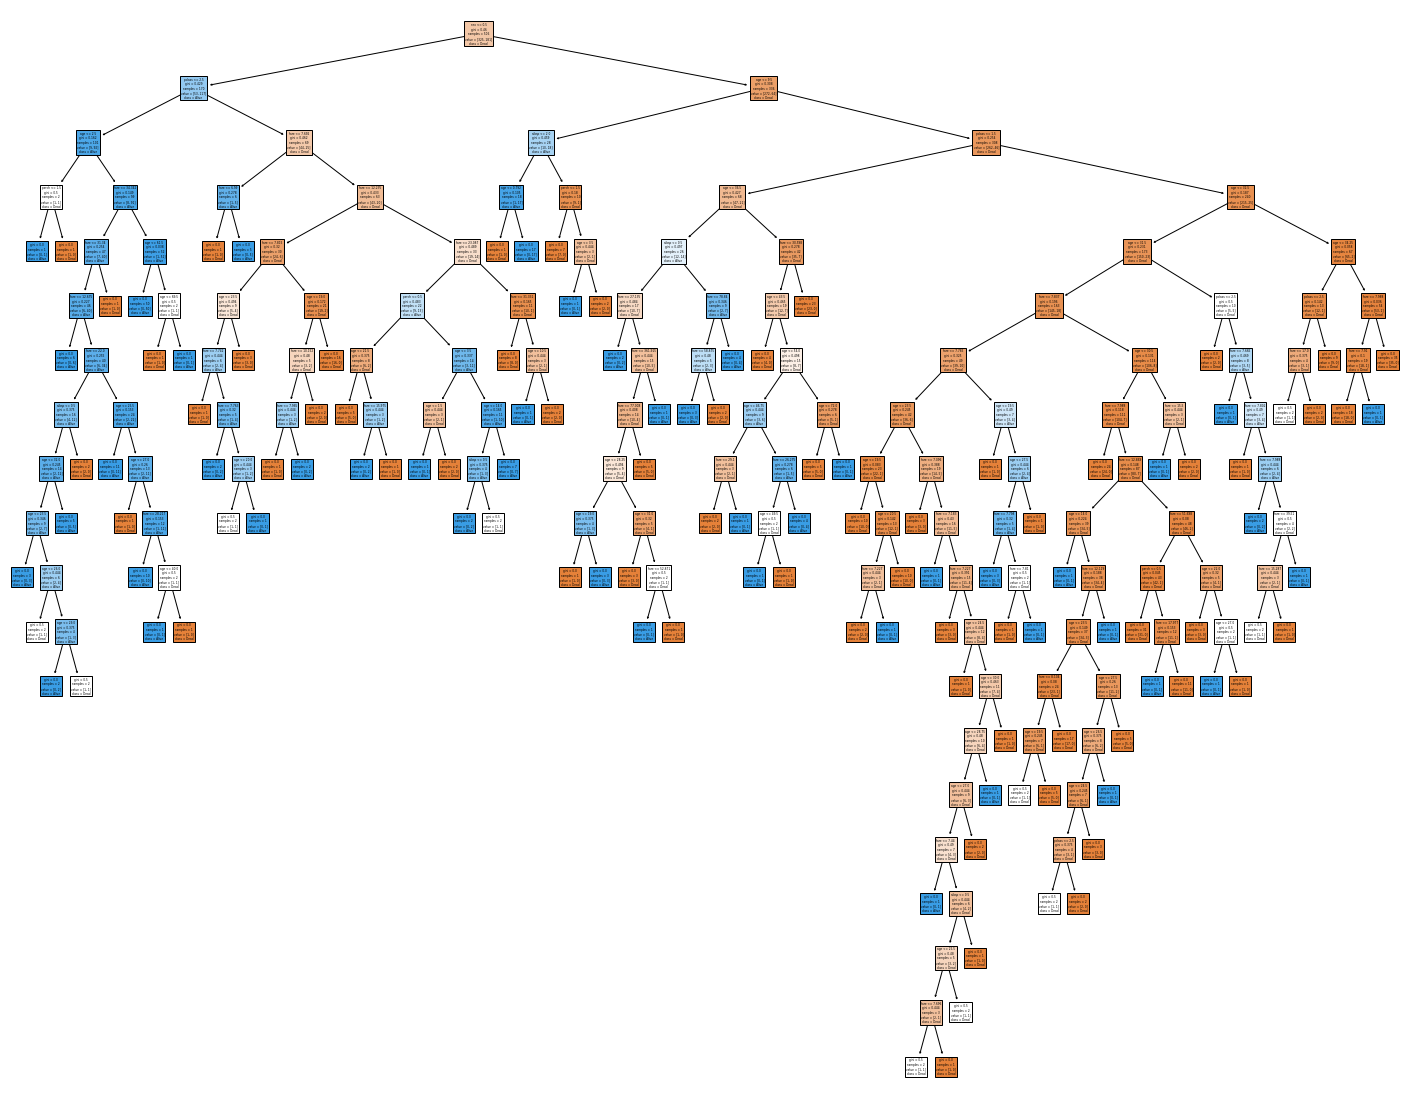

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_clf, feature_names=X.columns, class_names=["Dead", "Alive"], filled=True)
plt.show()

### K-Fold

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np

cross_val_scores = []

scores = cross_val_score(dt_clf, X, Y, cv = 5)
cross_val_scores.append(np.mean(scores))
print("The cross-validation scores using cross_val_score method are: \n{0}".format(scores))
print("Mean of k-fold scores using cross_val_score method is: {0}".format(np.mean(scores)))

The cross-validation scores using cross_val_score method are: 
[0.77037037 0.78518519 0.72592593 0.73333333 0.77777778]
Mean of k-fold scores using cross_val_score method is: 0.7585185185185186


### Prepruning

In [16]:
train_accuracy = []
test_accuracy = []

for depth in range(2, 10):
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    dt_clf.fit(X_train, y_train)
    print("Depth = ", depth)
    print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt_clf.predict(X_train))*100)
    train_accuracy.append(accuracy_score(y_true=y_train, y_pred=dt_clf.predict(X_train))*100)
    print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=dt_clf.predict(X_test))*100)
    test_accuracy.append(accuracy_score(y_true=y_test, y_pred=dt_clf.predict(X_test))*100)
    print()
    

Depth =  2
Accuracy Score on train data:  82.21343873517787
Accuracy Score on test data:  80.4733727810651

Depth =  3
Accuracy Score on train data:  84.58498023715416
Accuracy Score on test data:  81.06508875739645

Depth =  4
Accuracy Score on train data:  85.57312252964427
Accuracy Score on test data:  78.69822485207101

Depth =  5
Accuracy Score on train data:  87.35177865612648
Accuracy Score on test data:  79.88165680473372

Depth =  6
Accuracy Score on train data:  89.32806324110672
Accuracy Score on test data:  78.10650887573965

Depth =  7
Accuracy Score on train data:  92.09486166007905
Accuracy Score on test data:  78.10650887573965

Depth =  8
Accuracy Score on train data:  94.0711462450593
Accuracy Score on test data:  78.10650887573965

Depth =  9
Accuracy Score on train data:  95.0592885375494
Accuracy Score on test data:  79.28994082840237



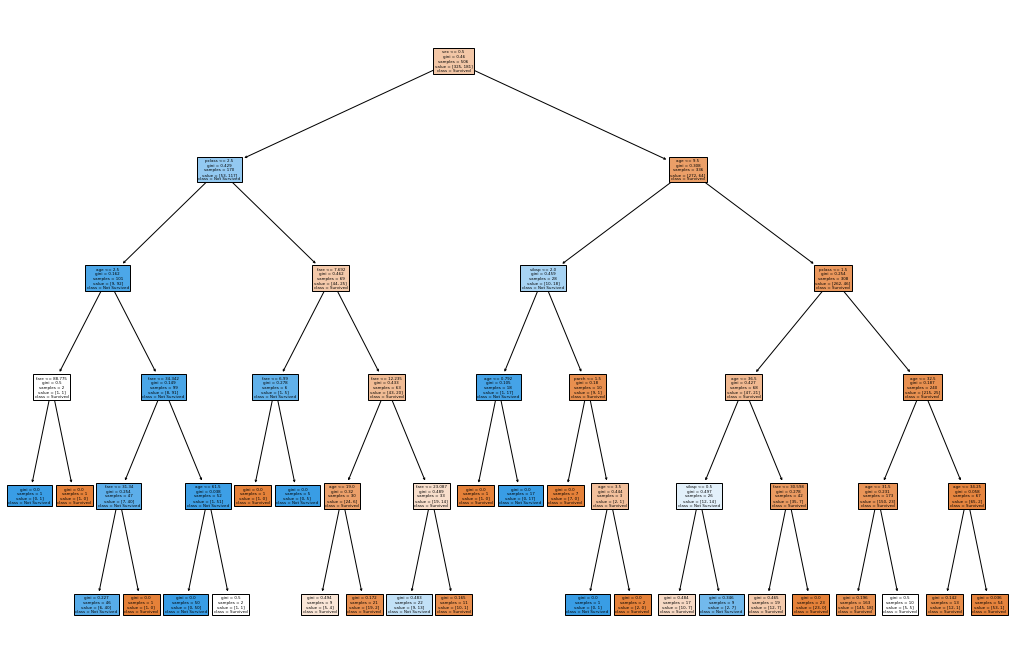

In [18]:
#depth = 5
from sklearn.tree import plot_tree

dt_clf = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(18,12))
features = ["pclass","sex","age","sibsp","parch","fare"]
classes = ["Survived", "Not Survived"]
plot_tree(dt_clf,feature_names=features,class_names=classes,filled=True)
plt.show()

### Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 15],
              "max_depth": [None, 2, 3, 5, 7, 10, 15, 20],
              "min_samples_leaf": [1, 3, 5, 7, 9, 11],
              "max_leaf_nodes": [None, 3, 5, 7, 10, 15, 20]
         }

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=20), params, cv=10, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)


y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)*100

81.06508875739645

In [20]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=20)

### Test

In [21]:
df_test = pd.read_csv("titanic_test.csv")
df_test = df_test[["pclass","sex","age","sibsp","parch","fare"]]
df_test.head()

,pclass,sex,age,sibsp,parch,fare
0,1,male,17.0,0,2,110.8833
1,3,male,NaN,0,0,14.5000
2,1,male,31.0,1,0,52.0000
3,3,male,41.0,0,0,7.1250
4,3,male,21.0,0,0,7.8958


In [22]:
df_test.dropna(inplace=True)
le = LabelEncoder()
df_test.sex = le.fit_transform(df_test.sex)#male: 1, female: 0
df_test.head()

,pclass,sex,age,sibsp,parch,fare
0,1,1,17.0000,0,2,110.8833
2,1,1,31.0000,1,0,52.0000
3,3,1,41.0000,0,0,7.1250
4,3,1,21.0000,0,0,7.8958
5,3,1,0.3333,0,2,14.4000


In [23]:
dt_clf.predict(df_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,